Q3. STFT and Spectrogram Generation

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

sampling_rate, signal = wavfile.read("testing_voice.wav")

if len(signal.shape) > 1:
    signal = signal[:, 0]


C:\Users\Apurbo\AppData\Local\Temp\ipykernel_17976\3345768014.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read("testing_voice.wav")


(a) Implement STFT Using Frame-wise FFT (rfft)

In [2]:
# Frame parameters
frame_size = int(0.025 * sampling_rate)   # 25 ms
frame_shift = int(0.010 * sampling_rate)  # 10 ms

signal_length = len(signal)
num_frames = int(np.floor((signal_length - frame_size) / frame_shift)) + 1

# Hamming window (manual)
n = np.arange(frame_size)
hamming_window = 0.54 - 0.46 * np.cos((2 * np.pi * n) / (frame_size - 1))

# Initialize STFT matrix
stft_matrix = []

for i in range(num_frames):
    start = i * frame_shift
    end = start + frame_size
    frame = signal[start:end]
    
    windowed_frame = frame * hamming_window
    
    # rFFT (only positive frequencies)
    spectrum = np.fft.rfft(windowed_frame)
    
    stft_matrix.append(np.abs(spectrum))

stft_matrix = np.array(stft_matrix).T   # shape: (frequency_bins, frames)


(b) Convert Magnitude to dB and Plot Spectrogram

In [3]:
# Avoid log(0) by adding small constant
epsilon = 1e-10
spectrogram_db = 20 * np.log10(stft_matrix + epsilon)


Frequency and Time Axes

In [4]:
freqs = np.fft.rfftfreq(frame_size, d=1/sampling_rate)
times = np.arange(num_frames) * (frame_shift / sampling_rate)


Plot Spectrogram

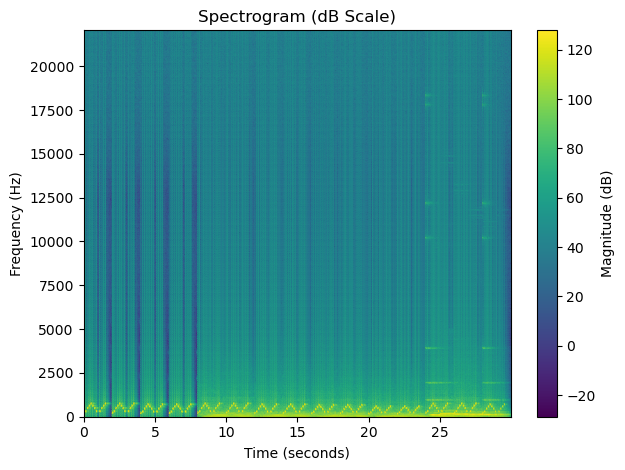

In [5]:
plt.figure()
plt.pcolormesh(times, freqs, spectrogram_db, shading='gouraud')
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (dB Scale)")
plt.colorbar(label="Magnitude (dB)")
plt.tight_layout()
plt.show()
